In [1]:
pip install pandas numpy scikit-learn lightgbm matplotlib seaborn

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 5.3 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd, seaborn as sns, numpy as np

In [38]:
df = pd.read_csv("../data/raw/Energy_consumption.csv")

In [39]:
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


Identifying missing values and patterns.
Visualizing distributions of target and features with a histogram

In [40]:
df.isna().sum()

Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

In [41]:
df.describe() # Tabular distribution

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873
std,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112
min,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690
50%,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696
75%,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'SquareFootage'}>,
        <Axes: title={'center': 'Occupancy'}>],
       [<Axes: title={'center': 'RenewableEnergy'}>,
        <Axes: title={'center': 'EnergyConsumption'}>]], dtype=object)

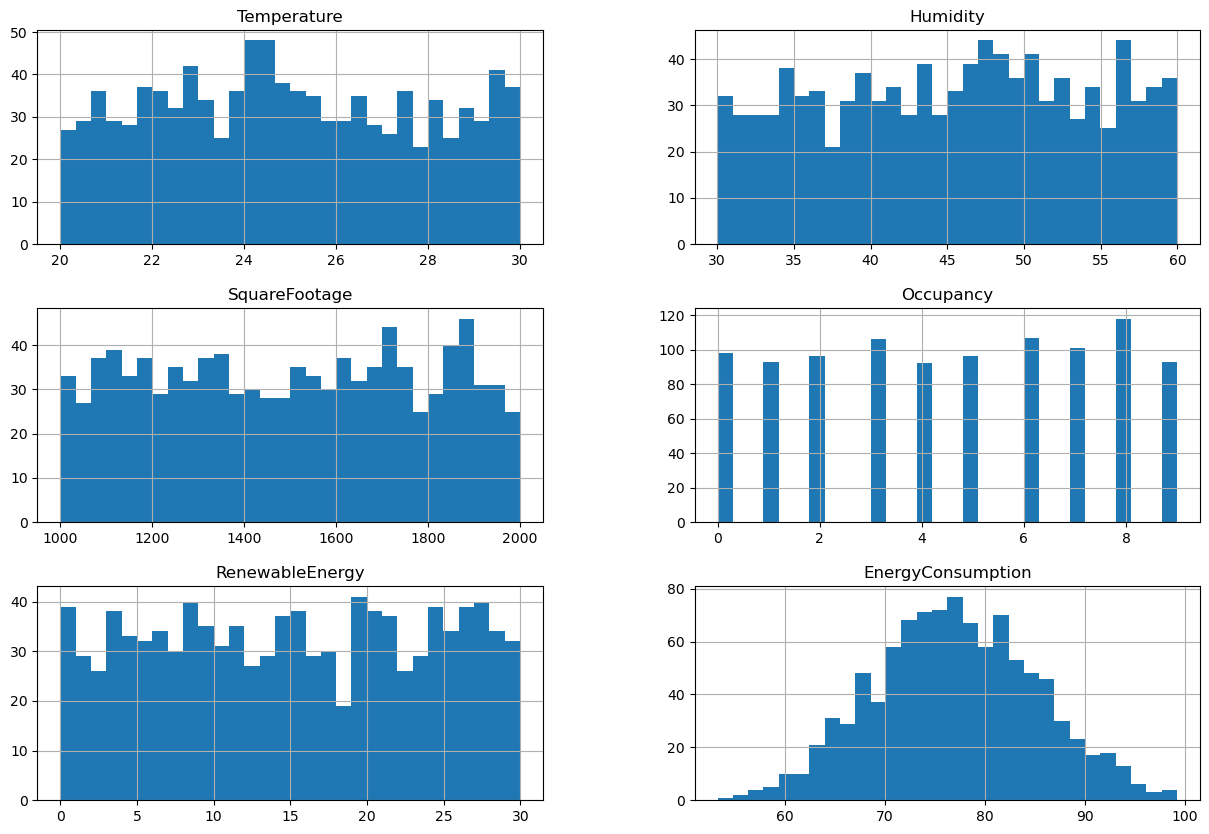

In [42]:
df.hist(bins=30, figsize=(15, 10))

<Axes: >

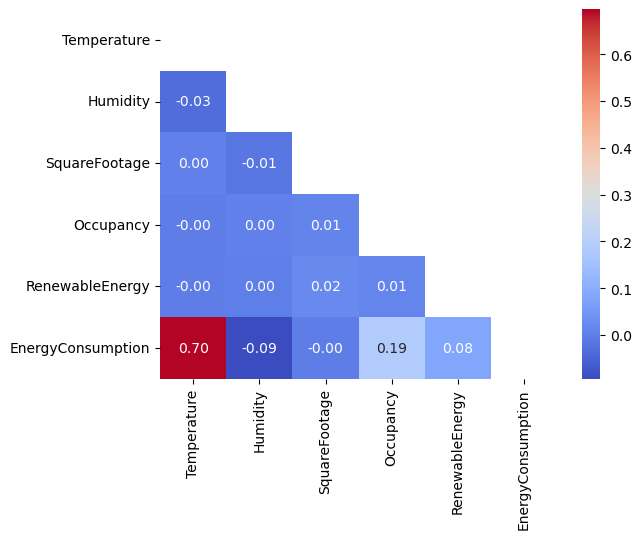

In [43]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")

In [44]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

df["Hour"] = df["Timestamp"].dt.hour
df["Day"] = df["Timestamp"].dt.day
df["Month"] = df["Timestamp"].dt.month


The reason for decomposing the timestamp into hour, day and month is to
factor into weather changes asscoiated with time of the day and month.

In [45]:
df = df.drop("Timestamp", axis=1)

In [46]:
df.head(3)

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Hour,Day,Month
0,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373,0,1,1
1,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855,1,1,1
2,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888,2,1,1


Changed 'Off' and 'On' to numerical represntation

In [47]:
df['HVACUsage'] = df['HVACUsage'].map({'Off': 0, 'On': 1})
df['LightingUsage'] = df['LightingUsage'].map({'Off': 0, 'On': 1})

In [48]:
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Hour,Day,Month
0,25.139433,43.431581,1565.693999,5,1,0,2.774699,Monday,No,75.364373,0,1,1
1,27.731651,54.225919,1411.064918,1,1,1,21.831384,Saturday,No,83.401855,1,1,1
2,28.704277,58.907658,1755.715009,2,0,0,6.764672,Sunday,No,78.270888,2,1,1
3,20.080469,50.371637,1452.316318,1,0,1,8.623447,Wednesday,No,56.519850,3,1,1
4,23.097359,51.401421,1094.130359,9,1,0,3.071969,Friday,No,70.811732,4,1,1


<Axes: >

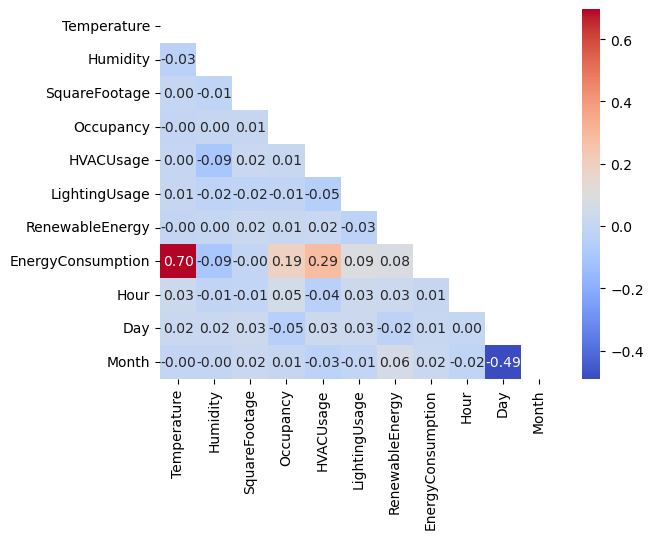

In [49]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")